#imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib


#load Data

In [2]:
df=pd.read_csv('./bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df[df['y']=='yes'].head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


# Explore data

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## pdays 

In [6]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

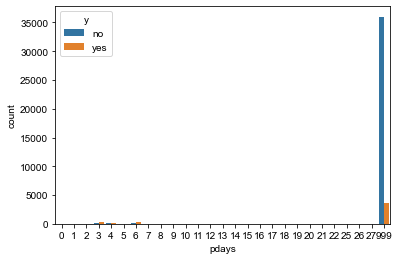

In [7]:
sns.countplot(x="pdays", hue="y", data=df)
sns.set(rc={'figure.figsize':(8,10.27)})

## change pdays to be either client has been called or not

In [8]:
def pdays(row):
    
    if(row['pdays']==999):
        return 0;
    return 1;

In [9]:
df['pdays']=df.apply(lambda row: pdays(row),axis=1)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## drop duration col as per dataset recommendation

In [10]:
df=df.drop(['duration'],axis=1)

## month

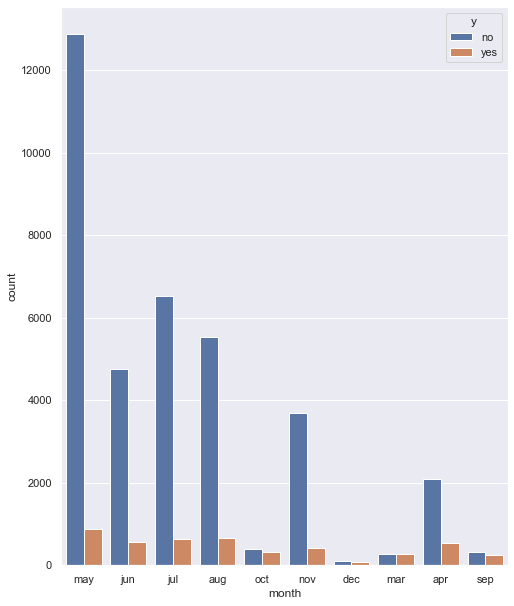

In [11]:
sns.countplot(x="month", hue="y", data=df)
sns.set(rc={'figure.figsize':(7.7,8.27)})

In [12]:
def getSeason(row):

    season = {
            'dec':'Winter', 'jan':'Winter', 'feb':'Winter',
            'mar':'Spring', 'apr':'Spring', 'may':'Spring',
            'jun':'Summer', 'jul':'Summer', 'aug':'Summer',
            'sep':'Autumn', 'oct':'Autumn', 'nov':'Autumn'}
    return season.get(row['month'])

In [13]:
df['season']=df.apply(lambda row: getSeason(row),axis=1)
df=df.drop(['month'],axis=1)

# week day

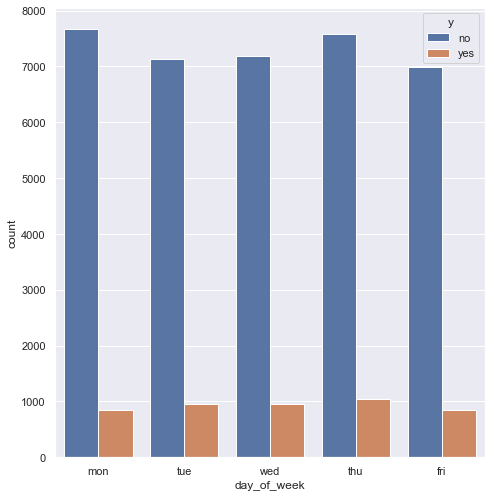

In [14]:
sns.countplot(x="day_of_week", hue="y", data=df)
sns.set(rc={'figure.figsize':(7.7,8.27)})

In [15]:
df=df.drop(['day_of_week'],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,season
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
1,57,services,married,high.school,unknown,no,no,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
2,37,services,married,high.school,no,yes,no,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
3,40,admin.,married,basic.6y,no,no,no,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
4,56,services,married,high.school,no,no,yes,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring


## target variable

<AxesSubplot:xlabel='y', ylabel='count'>

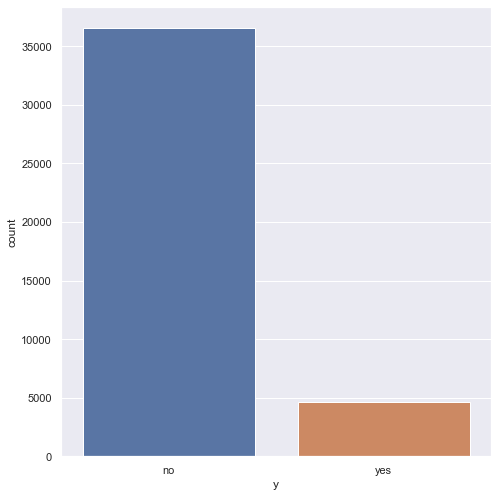

In [16]:
sns.countplot(x='y',data=df)

## catgerorical features

In [17]:
cat=df.select_dtypes(include=object)
cal_columns=cat.columns
cal_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'season'],
      dtype='object')

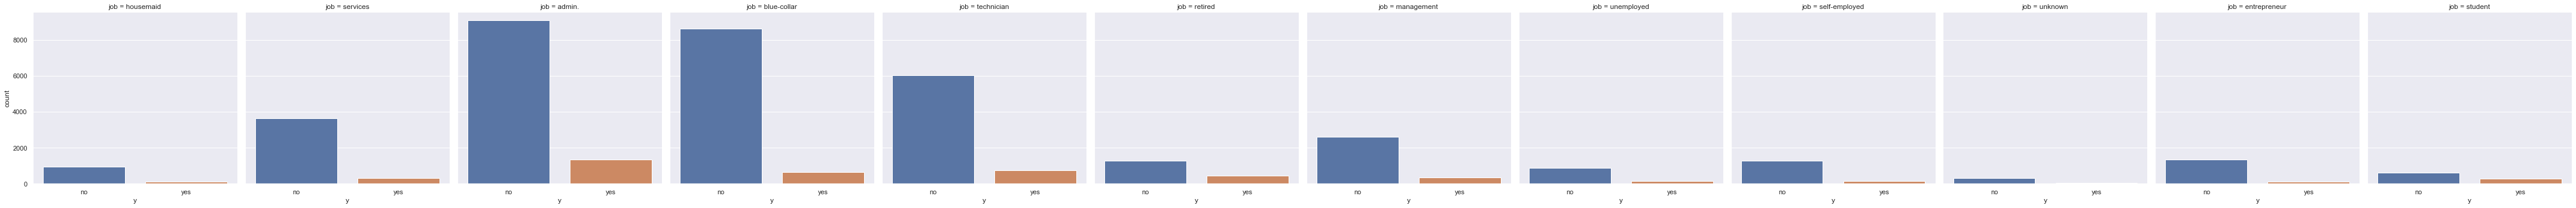

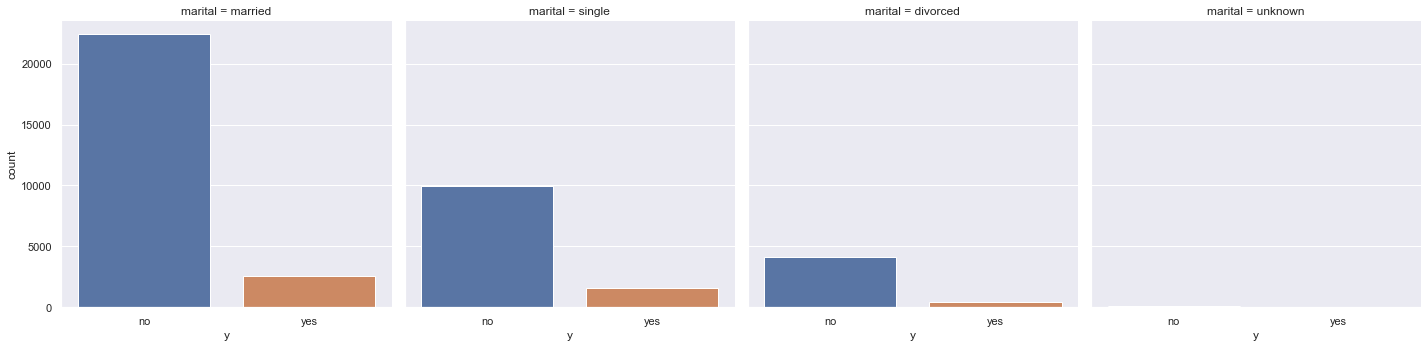

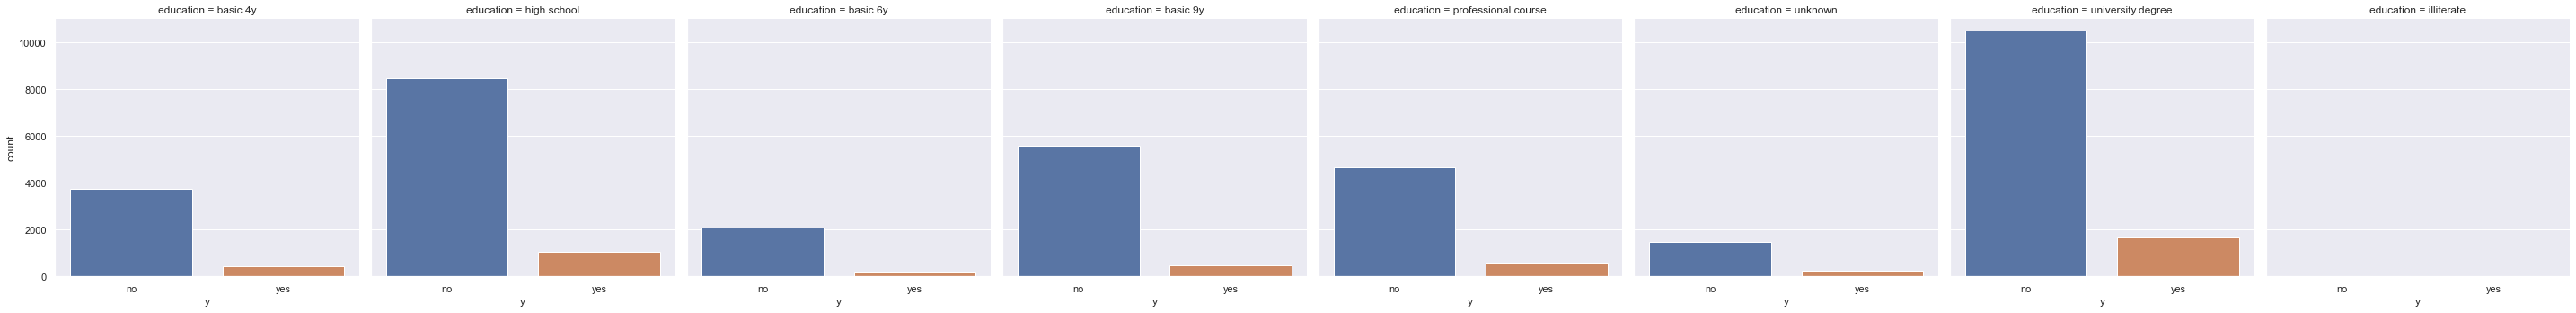

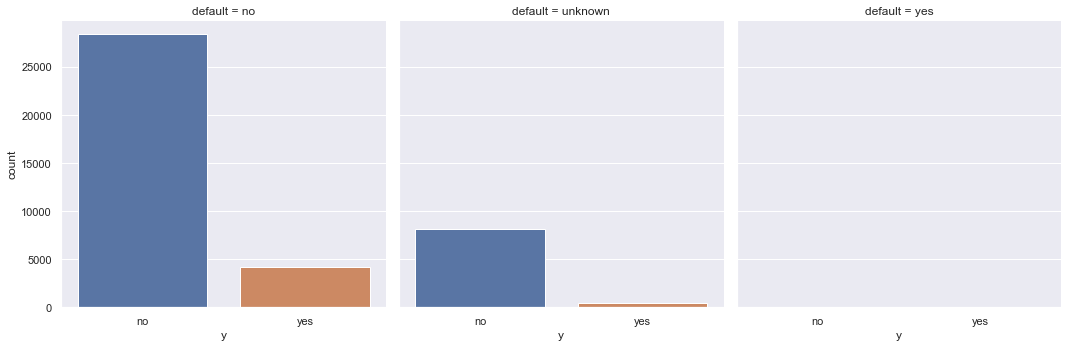

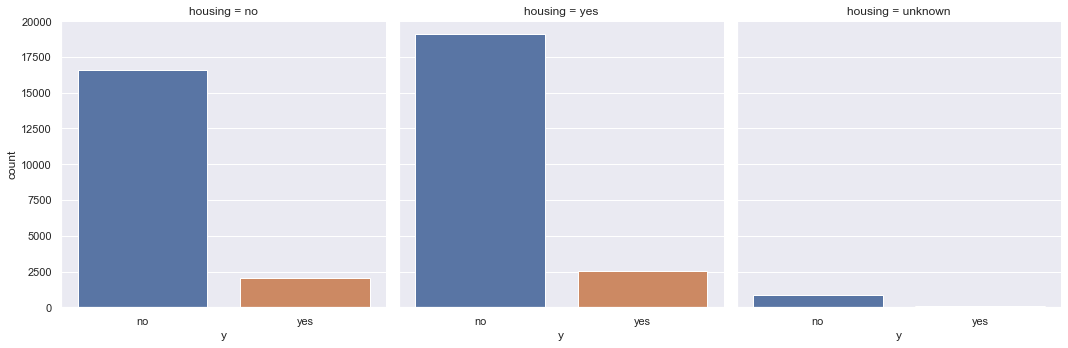

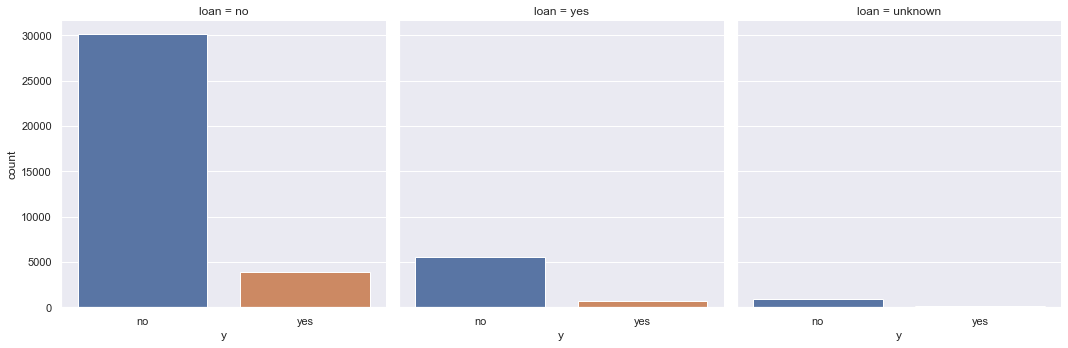

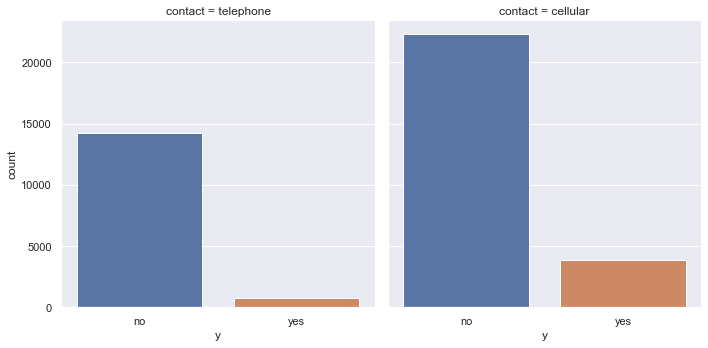

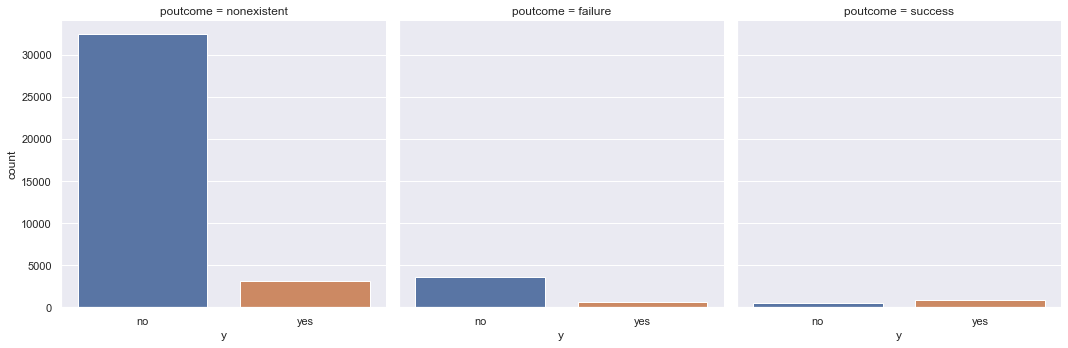

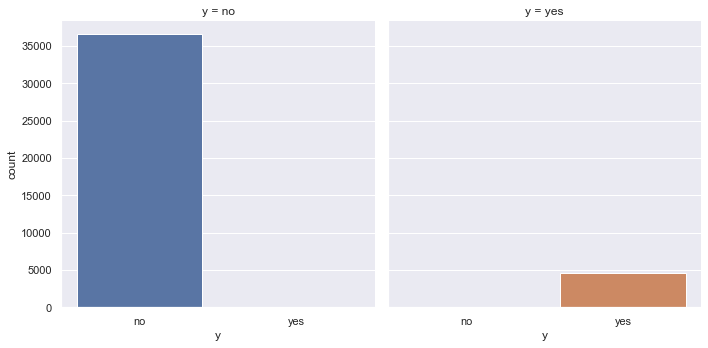

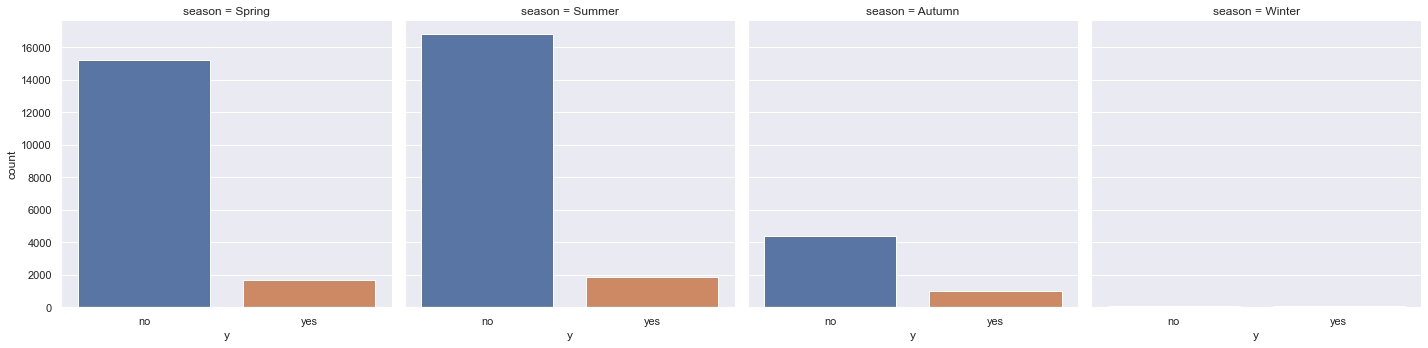

In [18]:
for cat_features in cal_columns:
    sns.catplot(x='y', col=cat_features, kind='count', data= df)
plt.show()

## numeric features

In [19]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004594,0.034292,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
campaign,0.004594,1.000000,-0.052569,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,0.034292,-0.052569,1.000000,0.587462,-0.270945,-0.078715,0.091254,-0.296920,-0.372682
previous,0.024365,-0.079141,0.587462,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,0.150754,-0.270945,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.127836,-0.078715,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.013733,0.091254,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,0.135133,-0.296920,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,0.144095,-0.372682,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [20]:
df=df.drop(['nr.employed','emp.var.rate'],axis=1)# highly correlated with euribor3m
df.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,season
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,0,0,nonexistent,93.994,-36.4,4.857,no,Spring
1,57,services,married,high.school,unknown,no,no,telephone,1,0,0,nonexistent,93.994,-36.4,4.857,no,Spring
2,37,services,married,high.school,no,yes,no,telephone,1,0,0,nonexistent,93.994,-36.4,4.857,no,Spring
3,40,admin.,married,basic.6y,no,no,no,telephone,1,0,0,nonexistent,93.994,-36.4,4.857,no,Spring
4,56,services,married,high.school,no,no,yes,telephone,1,0,0,nonexistent,93.994,-36.4,4.857,no,Spring


## categorcial data to numeric

In [21]:
cat=df.select_dtypes(include=object)
cal_columns=cat.columns
cal_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'season'],
      dtype='object')

In [22]:
nominal=['job', 'marital', 'education','default', 'housing', 'loan', 'contact',
       'season', 'poutcome']
df = pd.get_dummies(df,columns=nominal)
df['y']=df['y'].map({'yes': 1,'no': 0})
df.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,job_blue-collar,...,loan_yes,contact_cellular,contact_telephone,season_Autumn,season_Spring,season_Summer,season_Winter,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,0,93.994,-36.4,4.857,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,57,1,0,0,93.994,-36.4,4.857,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,37,1,0,0,93.994,-36.4,4.857,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,40,1,0,0,93.994,-36.4,4.857,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,56,1,0,0,93.994,-36.4,4.857,0,0,0,...,1,0,1,0,1,0,0,0,1,0


## scaling 

In [23]:
numeric=df.select_dtypes(include=np.number)
numeric_colums=numeric.columns
numeric_colums

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='objec

In [24]:
numeric_colums=numeric_colums=['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'] 
scaler=StandardScaler()
scaler.fit(df[numeric_colums])
df[numeric_colums]=scaler.transform(df[numeric_colums])
scaler=StandardScaler()
scaler.fit(df[numeric_colums])
df[numeric_colums]=scaler.transform(df[numeric_colums])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   y                              41188 non-null  int64  
 8   job_admin.                     41188 non-null  float64
 9   job_blue-collar                41188 non-null  float64
 10  job_entrepreneur               41188 non-null  float64
 11  job_housemaid                  41188 non-null  float64
 12  job_management                 41188 non-null 

## datasplitting and oversampling to handle class imbalance

In [26]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='y',axis=1),df['y'],random_state=42,test_size=0.3)

In [27]:
y_train[38158]

1

In [28]:
X_train

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,...,loan_yes,contact_cellular,contact_telephone,season_Autumn,season_Spring,season_Summer,season_Winter,poutcome_failure,poutcome_nonexistent,poutcome_success
39075,-1.057857,0.156105,-0.195415,1.671136,-1.490351,1.621083,-1.679109,1.718146,-0.538317,-0.19143,...,-0.422872,0.75857,-0.75857,-0.387988,-0.836125,-0.910557,15.010253,2.947327,-2.514421,-0.18570
34855,-1.057857,0.517118,-0.195415,-0.349494,-1.179380,-1.231034,-1.367190,-0.582023,-0.538317,-0.19143,...,-0.422872,-1.31827,1.31827,-0.387988,1.195994,-0.910557,-0.066621,-0.339290,0.397706,-0.18570
7107,0.477486,-0.204909,-0.195415,-0.349494,0.722722,0.886447,0.714190,-0.582023,1.857642,-0.19143,...,-0.422872,-1.31827,1.31827,-0.387988,1.195994,-0.910557,-0.066621,-0.339290,0.397706,-0.18570
31614,-0.578062,-0.565922,-0.195415,1.671136,-1.179380,-1.231034,-1.322795,-0.582023,-0.538317,-0.19143,...,-0.422872,0.75857,-0.75857,-0.387988,1.195994,-0.910557,-0.066621,2.947327,-2.514421,-0.18570
34878,-0.769980,2.322186,-0.195415,-0.349494,-1.179380,-1.231034,-1.367190,1.718146,-0.538317,-0.19143,...,-0.422872,0.75857,-0.75857,-0.387988,1.195994,-0.910557,-0.066621,-0.339290,0.397706,-0.18570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.724952,-0.204909,-0.195415,-0.349494,0.722722,0.886447,0.712460,-0.582023,-0.538317,-0.19143,...,-0.422872,-1.31827,1.31827,-0.387988,1.195994,-0.910557,-0.066621,-0.339290,0.397706,-0.18570
11284,-0.290186,-0.565922,-0.195415,-0.349494,1.536429,-0.280328,0.772422,-0.582023,-0.538317,-0.19143,...,-0.422872,-1.31827,1.31827,-0.387988,-0.836125,1.098229,-0.066621,-0.339290,0.397706,-0.18570
38158,-0.482104,-0.565922,5.117304,1.671136,-1.977538,2.939106,-1.653164,1.718146,-0.538317,-0.19143,...,-0.422872,0.75857,-0.75857,2.577397,-0.836125,-0.910557,-0.066621,-0.339290,-2.514421,5.38503
860,-0.002309,-0.204909,-0.195415,-0.349494,0.722722,0.886447,0.711883,-0.582023,-0.538317,-0.19143,...,-0.422872,-1.31827,1.31827,-0.387988,1.195994,-0.910557,-0.066621,-0.339290,0.397706,-0.18570


In [29]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## logistic regression

In [30]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9000566480537348

In [31]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train_res,y_train_res)
model.score(X_test,y_test)

0.7908068301367646

## Random forest

In [32]:
model_rfr=RandomForestClassifier(n_estimators=500)
model_rfr.fit(X_train,y_train)
model_rfr.score(X_test,y_test)

0.8917212915756252

In [33]:
model_rfr_s=RandomForestClassifier(n_estimators=500)
model_rfr_s.fit(X_train_res,y_train_res)
model_rfr_s.score(X_test,y_test)

0.8803916808286801

## Adaboost

In [34]:
model_ada = AdaBoostClassifier(n_estimators=500, random_state=0)
# Train Adaboost Classifer
model_ada.fit(X_train, y_train)
model_ada.score(X_test,y_test)

0.8996520190984867

In [35]:
model_ada_s = AdaBoostClassifier(n_estimators=500, random_state=0)
# Train Adaboost Classifer
model_ada_s.fit(X_train_res,y_train_res)
model_ada_s.score(X_test,y_test)

0.8862992635753014

In [36]:
model_ada_s = AdaBoostClassifier(n_estimators=1000, random_state=0)
# Train Adaboost Classifer
model_ada_s.fit(X_train_res,y_train_res)
model_ada_s.score(X_test,y_test)

0.890102775754633

## XGBoost

In [37]:
from xgboost import XGBClassifier
xgb_classifier =  XGBClassifier(n_estimators=500, random_state=0)
xgb_classifier.fit(X_train,y_train)
xgb_classifier.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8913975884114267

In [51]:
from xgboost import XGBClassifier
xgb_classifier =  XGBClassifier(n_estimators=500, random_state=0)
xgb_classifier.fit(X_train_res,y_train_res)
xgb_classifier.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8913975884114267

In [39]:
from xgboost import XGBClassifier
xgb_classifier =  XGBClassifier(n_estimators=1000, random_state=0)
xgb_classifier.fit(X_train_res,y_train_res)
xgb_classifier.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8854900056648054

In [52]:
joblib.dump(xgb_classifier,'model.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [53]:
X_train_res.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [54]:
def getJob(job):
    job_list=['job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown']
    l=[1 if job==l  else 0  for l in job_list]
    return l

def getMarital(marital):
    marital_list=['marital_divorced', 'marital_married','marital_single', 'marital_unknown']
    l=[1 if marital==l  else 0  for l in marital_list]
    return l

def getEducation(education):
    education_list=[ 'education_basic.4y','education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course','education_university.degree', 'education_unknown']
    l=[1 if education==l  else 0  for l in education_list]
    return l

def getcredit(credit):
    credit_list=['default_no','default_unknown', 'default_yes']
    l=[1 if credit==l  else 0  for l in credit_list]
    return l

def getHousing(housing):
    housing_list=['housing_no', 'housing_unknown','housing_yes']
    l=[1 if housing==l  else 0  for l in housing_list]
    return l

def getLoan(loan):
    loan_list=['loan_no', 'loan_unknown', 'loan_yes']
    l=[1 if loan==l  else 0  for l in loan_list]
    return l

def getContact(contact):
    contact_list=['contact_cellular', 'contact_telephone']
    l=[1 if contact==l  else 0  for l in contact_list]
    return l

def getSeason(season):
    season_list=['season_Autumn','season_Spring', 'season_Summer', 'season_Winter']
    l=[1 if season==l  else 0  for l in season_list]
    return l

def getPoutcome(outcome):
    outcome_list=['poutcome_failure','poutcome_nonexistent', 'poutcome_success']
    l=[1 if outcome==l  else 0  for l in outcome_list]
    return l

def preprocess_data(data) :
    
    return [data.get('age'),data.get('campaign'),data.get('pdays'),data.get('previous'),data.get('cons_price_idx'),
     data.get('cons_conf_idx'),data.get('euribor3m')]+ getJob(data.get('job'))+getMarital(data.get('marital'))+getEducation(data.get('education'))+getcredit(data.get('credit'))+getHousing(data.get('housing'))+getLoan(data.get('loan'))+getContact(data.get('contact'))+getSeason(data.get('season'))+getPoutcome(data.get('outcome'))
 

In [55]:
getJob('job_unemployed')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [56]:
data={'age' : 49, 'campaign' : 1, 'pdays' : 0, 
            'previous' : 0, 'cons_price_idx' : 93.994,
            'cons_conf_idx' : -36.4, 'euribor3m' : 4.857,
            'job' : 'job_technician', 'marital' : 'marital_married','education' : 'education_basic.9y', 'credit' : 'default_no',
            'housing' : 'housing_no', 'loan' : 'loan_no','contact' : 'contact_telephone', 
            'season' : 'season_Spring', 'outcome' : 'outcome_nonexistent'}

In [57]:
model=joblib.load('model.h5')

In [58]:
final_data = preprocess_data(data)
print(final_data)
scaled=scaler.transform([final_data])
#print(scaled)


[49, 1, 0, 0, 93.994, -36.4, 4.857, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
cols_when_model_builds = model.get_booster().feature_names


In [60]:
scaled_df=pd.DataFrame(scaled,columns=cols_when_model_builds)

In [61]:
prediction = model.predict(scaled_df)[0]
print(prediction)

1


In [50]:
cols_when_model_builds

['age',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']